In [5]:
from deepface import DeepFace
import cv2
import os

c:\Users\biodu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# visualise the frame
def visulaize_frame(frame):
    # Convert BGR to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [32]:
from sklearn import metrics


backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]

df_metrics = ["cosine", "euclidean", "euclidean_l2"]

models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [10]:
# import numpy as np
# embed_dict = np.load('embed_dict.npz', allow_pickle=True)


In [12]:
video_capture  =cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()

    try:
        detected_face = DeepFace.extract_faces(img_path=frame,
                                               target_size=(224,224),
                                               detector_backend=backends[3])
    except ValueError:
        print("skipping image")
        pass

    for faces in detected_face:
        print('about to detct face')
        x,y,w,h = faces['facial_area'].values()
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 3)
        cv2.imshow('detect face', frame)
    
    
        # crop image
        crop_img = frame[y:y+h, x:x+w]

        Recognise face
        get the embeddings
        encoding = DeepFace.represent(img_path=crop_img,
                                      model_name=models[2],
                                      enforce_detection=False)
        
    cv2.imshow('detect face', frame)

    
    

1/1 [==============================] - 0s 67ms/step
[{'face': array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), 'facial_area': {'x': 235, '

In [19]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
cap = cv2.VideoCapture(0)
while True:

    ret, frame = cap.read()

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, 1.3, 5)

    print(faces)
    break

[[247 177 166 166]]


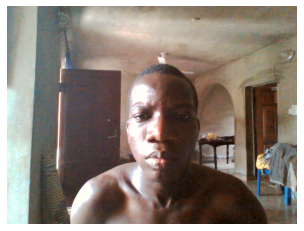

In [23]:
visulaize_frame(frame)

In [28]:
x, y, w, h = faces[0]
box = cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 3)


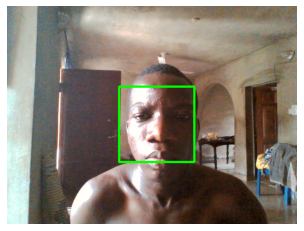

In [30]:
visulaize_frame(box)

In [18]:
for faces in detected_face:
    print(len(faces))

3


In [9]:
# DeepFace.extract_faces??

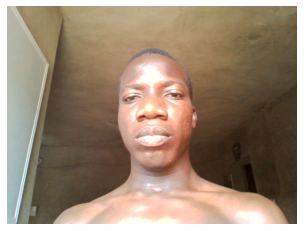

In [13]:
visulaize_frame(frame)

In [4]:
detected_face = DeepFace.extract_faces(img_path = '../images/pic.jpg', target_size=(224,224), detector_backend=backends[3])

1/1 [==============================] - 0s 55ms/step


In [8]:
def process_image_id(image_file, embed_dict):
    best_match = {'match':0.25}
    ID = None

    # get embedding from img_file
    img_embed_arr = get_embedding(image_file)

    for id, embeddings in embed_dict.items():
        if embeddings:
            for embedding in embeddings:
                similarity_check = cosine_similarity(img_embed_arr, embedding)
                if similarity_check < best_match['match']:
                    best_match[id] = id
                    best_match['embedding'] = embedding
                    best_match['match'] = similarity_check
                    ID = id
                    print("Match found")

    if ID is not None:
        return ID
    else:
        return "User not in database"

list

In [34]:
import cv2
import numpy as np
from deepface import DeepFace

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
known_face_encodings = [] # Initialize with known face encodings
known_face_names = []

video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        face = frame[y:y+h, x:x+w]
        encoding = DeepFace.represent(face, model_name="Facenet512", enforce_detection=False)
        
        matches = DeepFace.find(img_path=encoding, db_path=known_face_encodings, model_name="Facenet512", distance_metric="euclidean_l2")
        
        name = "Unknown" if matches == [] else known_face_names[np.argmin(matches)]
        
        cv2.putText(frame, name, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
        
    cv2.imshow('Video', frame) 
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video_capture.release()
cv2.destroyAllWindows()

TypeError: stat: path should be string, bytes, os.PathLike or integer, not list